##**Introduction:-**


###Credit card:-
#####A credit card is a thin rectangular piece of plastic or metal issued by a bank or financial services company that allows cardholders to borrow funds with which to pay for goods and services with merchants that accept cards for payment. Credit cards impose the condition that cardholders pay back the borrowed money, plus any applicable interest, as well as any additional agreed-upon charges, either in full by the billing date or over time.

###Advantages of credit card :-
* Earn rewards such as cash back or miles points.

* Protection against credit card fraud.

* Credit score information for free.

* No foreign transaction fees.

* Increased purchasing power.

* Not linked to checking or savings account.

* Putting a hold on a rental car or hotel room.

###Eligibilty for creditcard :-
* Age 
* Income 
* Residency 
* Citizenship

##**GATHERING DATA**

In [1]:
import pandas as pd   #Library for manipualtion and filtering the data.
import numpy as np  #Library for scientific computing.
import matplotlib.pyplot as plt  #Library for Data visualization.
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [2]:
#Importing Credit Card dataset using read_csv in pandas.
df_credit_card = pd.read_csv("Credit_card.csv")

#Dataset of Credit Card has 1548 'records' and 18 'features'.
df_credit_card.shape

(1548, 18)

In [3]:
#Importing Credit Card Label dataset using read_csv in pandas.
df_label = pd.read_csv("Credit_card_label.csv")

#Dataset of Credit Card labels has 1548 'records' and 2 'features'.
df_label.shape

(1548, 2)

In [4]:
#Combining common datset using merge on "Ind_ID" column.
df = pd.merge(df_credit_card, df_label, on='Ind_ID', how='inner')

#Dataset of Credit Card 1548 'records' and 19 'features'.
df.shape

(1548, 19)

##**Basic Exploration:-**
###Columns description:-
FIRST FILE (Credit_card.csv)
* Ind_ID: Client ID

* Gender : Gender information

* Car_owner : Having car or not

* Propert_owner : Having property or not

* Children : Count of children

* Annual_income : Annual income

* Type_Income : Income type

* Education : Education level

* Marital_status : Marital_status

* Housing_type : Living style

* Birthday_count : Use backward count from current day (0), -1 means yesterday.

* Employed_days : Start date of employment. Use backward count from current day (0). Positive value means, individual is currently unemployed.

* Mobile_phone : Any mobile phone

* Work_phone : Any work phone

* Phone : Any phone number

* EMAIL_ID : Any email ID

* Type_Occupation : Occupation

* Family_Members : Family size

SECOND FILE (Credit_card_label.csv)


* ID : The joining key between application data and credit status data, same is Ind_ID

* Label : 0 is application approved and 1 is application rejected.

####Data Pre-Processing

In [5]:
#"head()" used to get first 5 rows of dataset.
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [6]:
#"describe()" used to give statistics for numerical parameteric column.
df.describe()

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
count,1.548000e+03,1548.000000,1.525000e+03,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.913993e+05,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,2.161499,0.113049
std,4.171759e+04,0.776691,1.132530e+05,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,0.947772,0.316755
min,5.008827e+06,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.045070e+06,0.000000,1.215000e+05,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,5.078842e+06,0.000000,1.665000e+05,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,5.115673e+06,1.000000,2.250000e+05,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,3.000000,0.000000
max,5.150412e+06,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000,1.000000


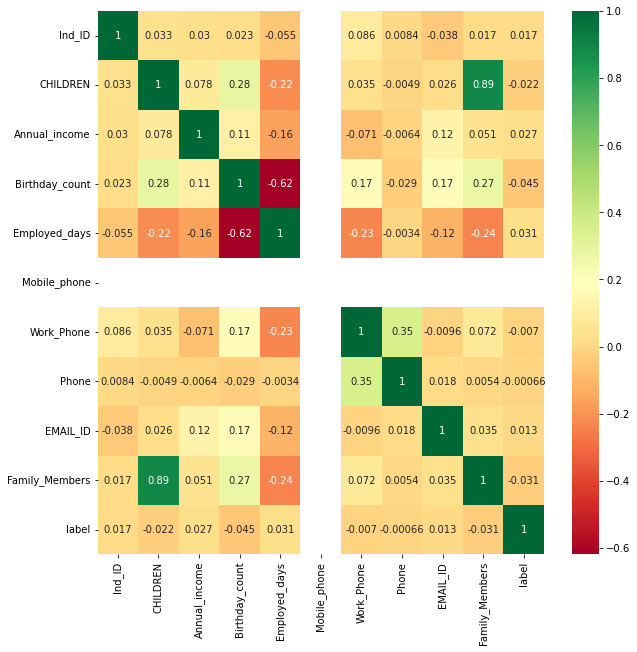

In [7]:
corr_df = df.corr()
top_corr_fig = corr_df.index
plt.figure(figsize=(10,10))
sns.heatmap(df[top_corr_fig].corr(), annot=True, cmap ="RdYlGn")
plt.show()

Observation :-  

* Numerical features - Annual Income, Birthday count, Employeed Days, Family Members and Children are more likely correlated to Credit Card Approval.
* Birthday count and Family Members are inversely correlated to "Label".
* Other are directly correlated.

In [8]:
#"nunique()" used to distinct values in each column in dataset.
df.nunique()

Ind_ID             1548
GENDER                2
Car_Owner             2
Propert_Owner         2
CHILDREN              6
Annual_income       115
Type_Income           4
EDUCATION             5
Marital_status        5
Housing_type          6
Birthday_count     1270
Employed_days       956
Mobile_phone          1
Work_Phone            2
Phone                 2
EMAIL_ID              2
Type_Occupation      18
Family_Members        7
label                 2
dtype: int64

In [9]:
#Dataset of Credit Card has 1548 rows and 19 columns.
df.shape

(1548, 19)

There are 1548 Samples with 19 featues.

In [10]:
#"isnull().sum()" give total null values in each column in dataset.
df.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [11]:
#"isnull().sum().sum()" gives total null values.
df.isnull().sum().sum()

540

There are total 540 Missing values :- 

(May be) 

* MCAR - Data not collected accordingly.
* MAR - Data not filled properly by customers.
* MNAR - Data not filled intensionally.

In [12]:
df.isnull().mean()*100

Ind_ID              0.000000
GENDER              0.452196
Car_Owner           0.000000
Propert_Owner       0.000000
CHILDREN            0.000000
Annual_income       1.485788
Type_Income         0.000000
EDUCATION           0.000000
Marital_status      0.000000
Housing_type        0.000000
Birthday_count      1.421189
Employed_days       0.000000
Mobile_phone        0.000000
Work_Phone          0.000000
Phone               0.000000
EMAIL_ID            0.000000
Type_Occupation    31.524548
Family_Members      0.000000
label               0.000000
dtype: float64

Observations :- 
* There are missing values in 4 features :- 
* Gender = 0.45%
* Annual Income = 1.48%
* Age = 1.42%
* Type of Occupation = 31.5%

In [13]:
#Extracting out the values count in each column using loop and "value_counts()".
for i in df.columns[1:]:
  print(df[i].value_counts())
  print("-------------------")

F    973
M    568
Name: GENDER, dtype: int64
-------------------
N    924
Y    624
Name: Car_Owner, dtype: int64
-------------------
Y    1010
N     538
Name: Propert_Owner, dtype: int64
-------------------
0     1091
1      305
2      134
3       16
4        1
14       1
Name: CHILDREN, dtype: int64
-------------------
135000.0    170
112500.0    144
180000.0    137
157500.0    125
225000.0    119
           ... 
119700.0      1
69372.0       1
37800.0       1
333000.0      1
69750.0       1
Name: Annual_income, Length: 115, dtype: int64
-------------------
Working                 798
Commercial associate    365
Pensioner               269
State servant           116
Name: Type_Income, dtype: int64
-------------------
Secondary / secondary special    1031
Higher education                  426
Incomplete higher                  68
Lower secondary                    21
Academic degree                     2
Name: EDUCATION, dtype: int64
-------------------
Married                 1049
Si

#**FEATURE ENGINEERING**

###Feature Transformation

Feature transformation is a mathematical transformation in which we apply a mathematical formula to a particular column (feature) and transform the values, which are useful for our further analysis. It is a technique by which we can boost our model performance. It is also known as "Feature Engineering", which creates new features from existing features that may help improve the model performance.

#####Column : Birthday Count

*   In the dataset, there are some negative values in which needs to be converted.
*   In "Employed_days", 0 or positive value should be 0 as "Experience".
* In "Birthday_count", negative value indicates birthday days.
*   "Birthday_count" and "Employed_days" columns need to converted into years with positive value in it.




In [14]:
print(df.shape)
df[df["Birthday_count"]>=0]

(1548, 19)


,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label


In [15]:
#Renaming the "Birthday_count" to "Age" by dividing 365.
df.rename(columns = {"Birthday_count" : "Age"}, inplace=True) 
df["Age"] = round(abs(df["Age"]/365))
# df[df["Employed_days"]>=0].head()

#####Column : Employed Days

In [16]:
print(df.shape)
df["Employed_days"][df["Employed_days"]>=0] = 0

(1548, 19)


In [17]:
#Renaming the "Employed_days" to "Experience" by dividing 365.
df.rename(columns = {"Employed_days" : "Experience"}, inplace=True) 
df["Experience"] = round(abs(df["Experience"]/365),1)

###Missing Values

Missing Data can occur when no information is provided for one or more items or for a whole unit. Missing Data is a very big problem in a real-life scenarios. In DataFrame sometimes many datasets simply arrive with missing data, either because it exists and was not collected or it never existed.

There are varioud techniques to handle missign values :-
* Remove technique
* Imputation technique


#####Imputation :- 
* Univariate Variable
   * Numerical Feature - Mean/ Median.
   * Categorical Feature - Mode or "Missing".
* Multivariate Variable
   * KNN Imputation
   * Iterative (MICE) Imputation


In [18]:
df.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Age                 22
Experience           0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

#####Column : Gender

In [19]:
df["GENDER"].value_counts()

F    973
M    568
Name: GENDER, dtype: int64

<Axes: xlabel='GENDER', ylabel='Count'>

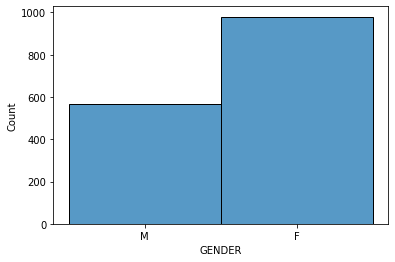

In [20]:
#Importing SimpleImputer from sklearn
from sklearn.impute import SimpleImputer 

# It is Categorical(Nominal) - Gender
# Defining "Most Frequent" to Null values as it has less than 5% of values.
mode_imputer_gender = SimpleImputer(strategy='most_frequent') 
gender_reshape = np.array(df["GENDER"]).reshape(-1, 1)
df["GENDER"] = mode_imputer_gender.fit_transform(gender_reshape)
sns.histplot(df["GENDER"])

In [21]:
df["GENDER"].value_counts()

#Increase of 7 values in "Female".

F    980
M    568
Name: GENDER, dtype: int64

#####Column : Annual Income

<Axes: xlabel='Annual_income', ylabel='Count'>

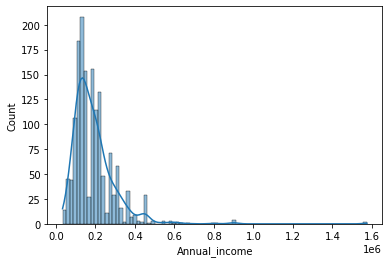

In [22]:
sns.histplot(df["Annual_income"], kde = True)

<Axes: xlabel='Annual_income', ylabel='Count'>

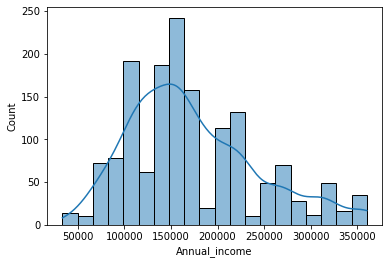

In [23]:
q3_income = df["Annual_income"].quantile(0.75)
q1_income = df["Annual_income"].quantile(0.25)
iqr_income = q3_income - q1_income
upper_income = q3_income + (1.5 * iqr_income)
inner_income = q1_income - (1.5*iqr_income)

#Replacing outliers with NAN value.
for i in df["Annual_income"]:
  if i > upper_income:
    df["Annual_income"].replace(i,np.nan, inplace = True)

#As the data is skewed, we will replace NAN value with Median value.
from sklearn.impute import SimpleImputer 
mode_imputer_income = SimpleImputer(strategy='median') 
income_reshape = np.array(df["Annual_income"]).reshape(-1, 1)
df["Annual_income"] = mode_imputer_income.fit_transform(income_reshape)
sns.histplot(df["Annual_income"], kde = True)

<Axes: >

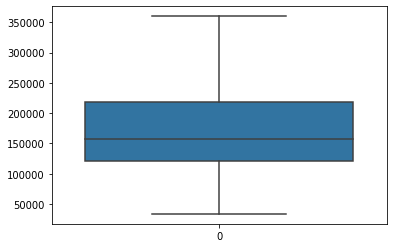

In [24]:
sns.boxplot(df["Annual_income"])

#####Column : Age

<Axes: xlabel='Age', ylabel='Count'>

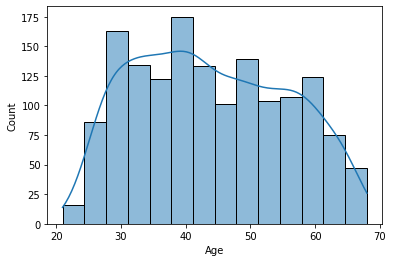

In [25]:
sns.histplot(df["Age"], kde = True)

<Axes: xlabel='Age', ylabel='Count'>

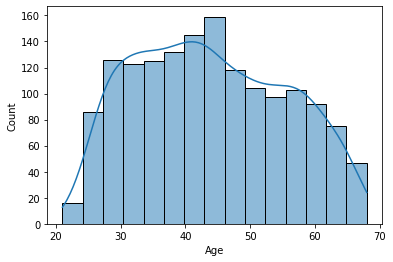

In [26]:
#KNN Imputation : Identifies the neighboring points through a measure of distance and the missing values can be estimated using completed values of neighboring observations.

from sklearn.impute import KNNImputer 
knn_imputer_age = KNNImputer(n_neighbors=10) 
income_reshape = np.array(df["Age"]).reshape(-1, 1)
df["Age"] = knn_imputer_age.fit_transform(income_reshape)
sns.histplot(df["Age"], kde = True)

<Axes: >

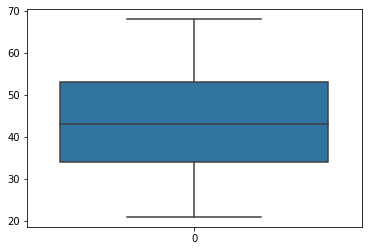

In [27]:
sns.boxplot(df["Age"])

#####Column : Type of Occupation

In [28]:
df['Type_Occupation'].isna().mean()*100

31.52454780361757

In [29]:
df['Type_Occupation'].isna().sum()

488

Type_Occupation has 488 Missing values that is 31.5% of total value in that column.

In [30]:
df["Type_Occupation"].unique()

array([nan, 'Core staff', 'Cooking staff', 'Laborers', 'Sales staff',
       'Accountants', 'High skill tech staff', 'Managers',
       'Cleaning staff', 'Drivers', 'Low-skill Laborers', 'IT staff',
       'Waiters/barmen staff', 'Security staff', 'Medicine staff',
       'Private service staff', 'HR staff', 'Secretaries',
       'Realty agents'], dtype=object)

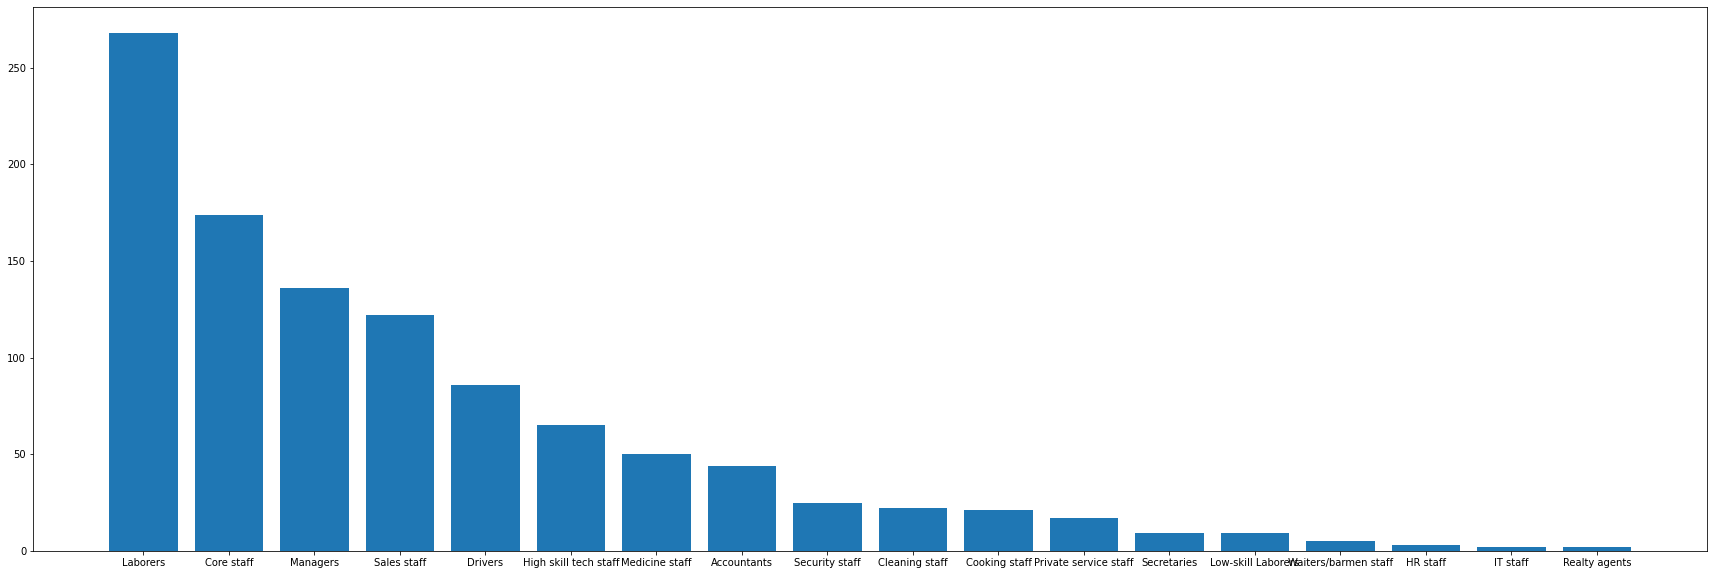

In [31]:
plt.figure(figsize = (30,10))
plt.bar(df["Type_Occupation"].value_counts().index,df["Type_Occupation"].value_counts().values)
plt.show()

In [32]:
New_type_Occupation = df["Type_Occupation"].fillna("Missing", inplace = True)

In [33]:
df.drop('Type_Occupation', axis = 1, inplace = True)

Obeseravtion

* This column has 31.5% of missing values.
* We can not replace it with Mode value, but we are trying an hypothesis by filling "Missing" at Nan. 
* If ML Model accauracy improve for "New_type_Occupation" column, will call in the end.

###Outliers

An outlier is an observation that lies an abnormal distance from other values in a random sample from a population.

There are various techniques to deal with Outliers :- 
* Trimming
* Capping


These 2 things can be done under these concepts :- 
* Z-Score : Trimming and Capping at (mean ± 3* STD)
* IQR Based Filtering 
* Percentile : Triiming and Capping at (99% and 1%)
* Winsorization : Capping at (99% and 1%)


In [34]:
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Age,Experience,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,51.000000,0.0,1,0,0,0,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.000000,1.6,1,1,1,0,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,43.952818,1.6,1,1,1,0,2,1
3,5009749,F,Y,N,0,157500.0,Commercial associate,Higher education,Married,House / apartment,37.000000,1.6,1,1,1,0,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.000000,1.6,1,1,1,0,2,1


#####Column : Children

In [35]:
df["CHILDREN"].isna().mean()*100

0.0

<Axes: xlabel='CHILDREN', ylabel='Count'>

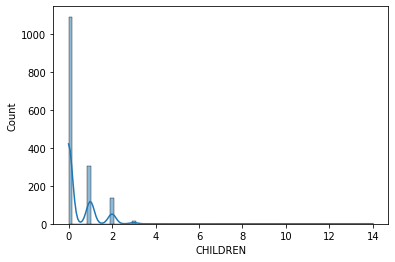

In [36]:
sns.histplot(df["CHILDREN"], kde = True)

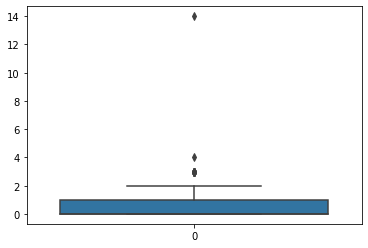

In [37]:
sns.boxplot(df["CHILDREN"])
plt.show() 

In [38]:
q3_child = df["CHILDREN"].quantile(0.75)
q1_child = df["CHILDREN"].quantile(0.25)
iqr_child = q3_child - q1_child
upper_child = q3_child + (1.5*iqr_child)
lower_child = q1_child - (1.5*iqr_child)


outier_child = 0
for i in df["CHILDREN"]:
  if i > upper_child:
    outier_child+=1
print("Total rows removed :",outier_child)


df.drop(df[(df["CHILDREN"]>upper_child)].index, inplace=True)
df.drop(df[(df["CHILDREN"]<lower_child)].index, inplace=True)

Total rows removed : 18


#####Column : Age

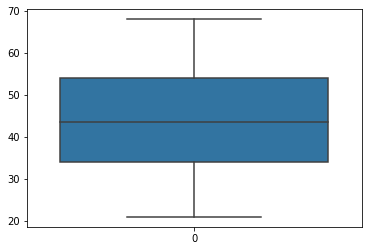

In [39]:
sns.boxplot(df["Age"])
plt.show()

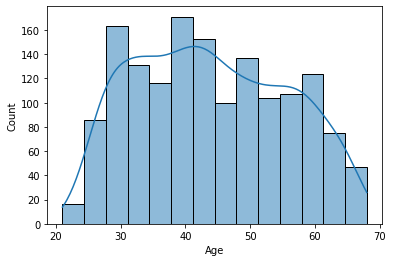

In [40]:
sns.histplot(df["Age"], kde=True)
plt.show()

In [41]:
q3_age = df["Age"].quantile(0.75)
q1_age = df["Age"].quantile(0.25)
iqr_age = q3_age - q1_age
upper_age = q3_age + (1.5*iqr_age)
inner_age = q1_age - (1.5*iqr_age)


outier_age = 0
for i in df["CHILDREN"]:
  if i > upper_child:
    outier_age+=1
print("Total Columns removed :",outier_age)


df.drop(df[(df["Age"]>upper_age)].index, inplace=True)
df.drop(df[(df["Age"]<inner_age)].index, inplace=True)

Total Columns removed : 0


#####Column : Experience

In [42]:
df["Experience"].isna().mean()*100

0.0

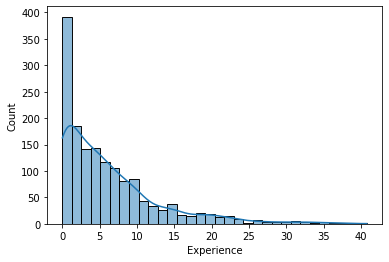

In [43]:
sns.histplot(df["Experience"], kde =True)
plt.show()

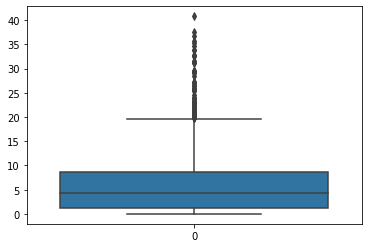

In [44]:
sns.boxplot(df["Experience"])
plt.show()

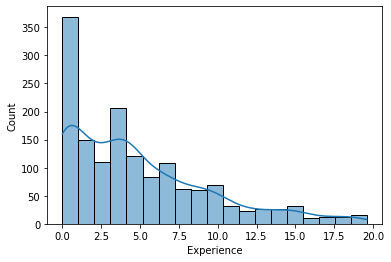

In [45]:
q3_exp = df["Experience"].quantile(0.75)
q1_exp = df["Experience"].quantile(0.25)
iqr_exp = q3_exp - q1_exp
upper_exp = q3_exp + (1.5*iqr_exp)
lower_exp = q1_exp - (1.5*iqr_exp)

#Replacing outliers with NAN value.
for i in df["Experience"]:
  if i > upper_exp:
    df["Experience"].replace(i,np.nan, inplace = True)

#As the data is skewed, we will replace NAN value with Median value.
from sklearn.impute import SimpleImputer 
knn_imputer_exp = SimpleImputer(strategy='median') 
exp_reshape = np.array(df["Experience"]).reshape(-1, 1)
df["Experience"] = knn_imputer_exp.fit_transform(exp_reshape)
sns.histplot(df["Experience"], kde = True)
plt.show()

#**EXPORT TO_CSV**

In [46]:
df.to_csv("credit_card_sql.csv", index = False)

#**EXPLORATORY DATA ANALYSIS**

#####BivariateAnalysis

                            Type_Income
label Type_Income                      
0     Commercial associate          311
      Pensioner                     226
      State servant                 110
      Working                       709
1     Commercial associate           49
      Pensioner                      42
      State servant                   6
      Working                        77




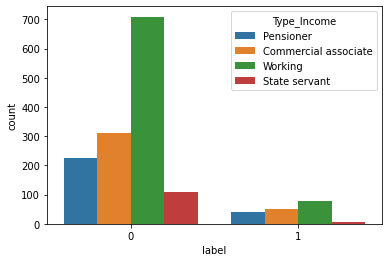

In [47]:
print(df.groupby(["label", "Type_Income"])[["Type_Income"]].count())
print("\n")
sns.countplot(x = "label", hue = "Type_Income", data = df)
plt.show()

Obseravtion

* There are 4 types of Income
    * Pensioner
    *  Commerical Associate
    * Working
    * State Servant
* Ther are more chances of getting Credit Card of "Working" as Compared to Other Income type.

* In the Same Category(Approval), There are **52.28%** more chances to get Credit Card to working professinal.

* There is **88.6%** Credit Card Approved and **11.4%** Rejected on the basis of Income type.

                           Housing_type
label Housing_type                     
0     Co-op apartment                 3
      House / apartment            1218
      Municipal apartment            36
      Office apartment                7
      Rented apartment               17
      With parents                   75
1     Co-op apartment                 2
      House / apartment             145
      Municipal apartment            16
      Office apartment                2
      Rented apartment                4
      With parents                    5




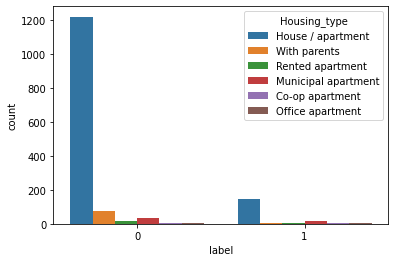

In [48]:
print(df.groupby(["label", "Housing_type"])[["Housing_type"]].count())
print("\n")
sns.countplot(x = "label", hue = "Housing_type", data = df)
plt.show()

Obseravtion :- 

* There are 6 types of Housing
    * House/Apartment
    *  With Parents
    * Rented Apartment
    * Municipal Apartment
    * Co-op Apartment
    * Office Apartment
* Ther are more chances of getting Credit Card of "House Apartment" as Compared to Other House type.

* In the Same Category(Approval), There are **89.82%** more chances to get Credit Card to House Apartment. Hence, we can say there is domination of Working in Housing Type. There is chances of removing this column from the dataset.

* There is **88.6%** Credit Card Approved and **11.4%** Rejected on the basis of Housing type.

                      Annual_income
Type_Income                        
Commercial associate  192895.000000
Pensioner             145623.509328
State servant         187293.103448
Working               171981.389313




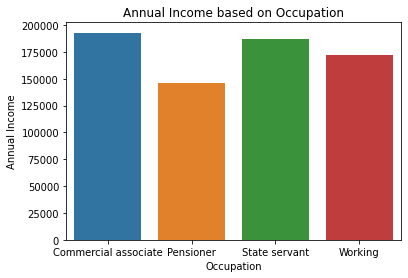

In [49]:
# cat = df[["Type_Income", "Annual_income"]].groupby(['Type_Income'], as_index=False).sum().sort_values(by='Annual_income', ascending=False)

print(df[["Type_Income", "Annual_income"]].groupby(['Type_Income']).mean())
print("\n")

cat = df[["Type_Income", "Annual_income"]].groupby(['Type_Income'], as_index=False).mean()
sns.barplot(x = "Type_Income", y = "Annual_income", data = cat)
plt.title("Annual Income based on Occupation")
plt.xlabel("Occupation")
plt.ylabel("Annual Income")
plt.show()

Obseravtion :- 

* There are 4 types of Income
    * Pensioner
    *  Commerical Associate
    * Working
    * State Servant
* The relationship between "Annual Income" and "Type of Income" show approximately same Statistics of all Income Type ranging from **1.4LPA** to **1.9LPA**. 

Mean of Annual Income by the Age are :
 Experience
(0, 3]      166268.487805
(3, 6]      182098.503741
(6, 9]      187274.663677
(9, 12]     202120.000000
(12, 15]    169100.649351
(15, 18]    185906.250000
(18, 21]    154782.000000
Name: Annual_income, dtype: float64 



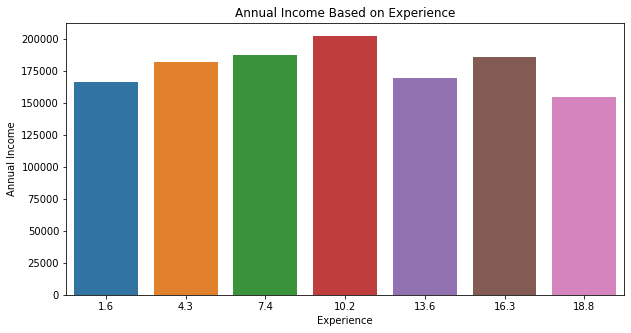

In [50]:
#Cutting the Experience by ranges from 0 to 22 and getting the average annual Income based on the range of Experience.
exp1 = pd.cut(df["Experience"], bins = list(np.arange(0,23,3)))
print("Mean of Annual Income by the Age are :\n",df.groupby(exp1)["Annual_income"].mean(),"\n")

#Ploting the above code in Barchart for better understanding.
cat2 = round(df[['Experience',"Annual_income"]].groupby(pd.cut(df["Experience"], bins = list(np.arange(0,23,3))), as_index=False).mean(),1)
plt.figure(figsize =(10,5))
sns.barplot(x = "Experience", y = "Annual_income", data = cat2)
plt.title("Annual Income Based on Experience")
plt.xlabel("Experience")
plt.ylabel("Annual Income")
plt.show()

Obseravtion :- 

* Highest Average Income observed from the chart ranging between 9 to 12 years of Experience that is 2.02 LPA.

* Lowest or Average Income observed is around 1.6LPA.

Mean of Annual Income by the Age are :
 Age
(20, 30]    171035.526316
(30, 40]    181271.411483
(40, 50]    181740.579800
(50, 60]    164919.674556
(60, 70]    151615.862069
Name: Annual_income, dtype: float64 



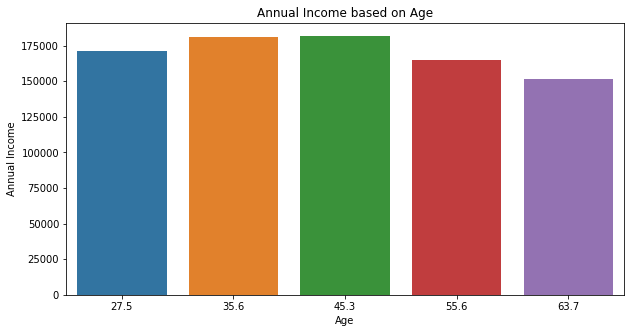

In [51]:
#Cutting the bins from 20 to 70 in 10 each part to get the  average annual income.
age = pd.cut(df["Age"], bins = [20,30,40,50,60,70])
print("Mean of Annual Income by the Age are :\n",df.groupby(age)["Annual_income"].mean(),"\n")

#Ploting the above code in Barchart for better understanding.
cat4 = round(df[['Age',"Annual_income"]].groupby(pd.cut(df["Age"], bins = [20,30,40,50,60,70]), as_index=False).mean(),1)
plt.figure(figsize =(10,5))
sns.barplot(x = "Age", y = "Annual_income", data = cat4)
plt.title("Annual Income based on Age")
plt.xlabel("Age")
plt.ylabel("Annual Income")
plt.show()

Obseravtion :-

* The relationship between "Annual Income" and "Age" show approximately same Statistics of all Income Type ranging from **1.5LPA** to **1.8LPA**.

#####Multivariate Analysis

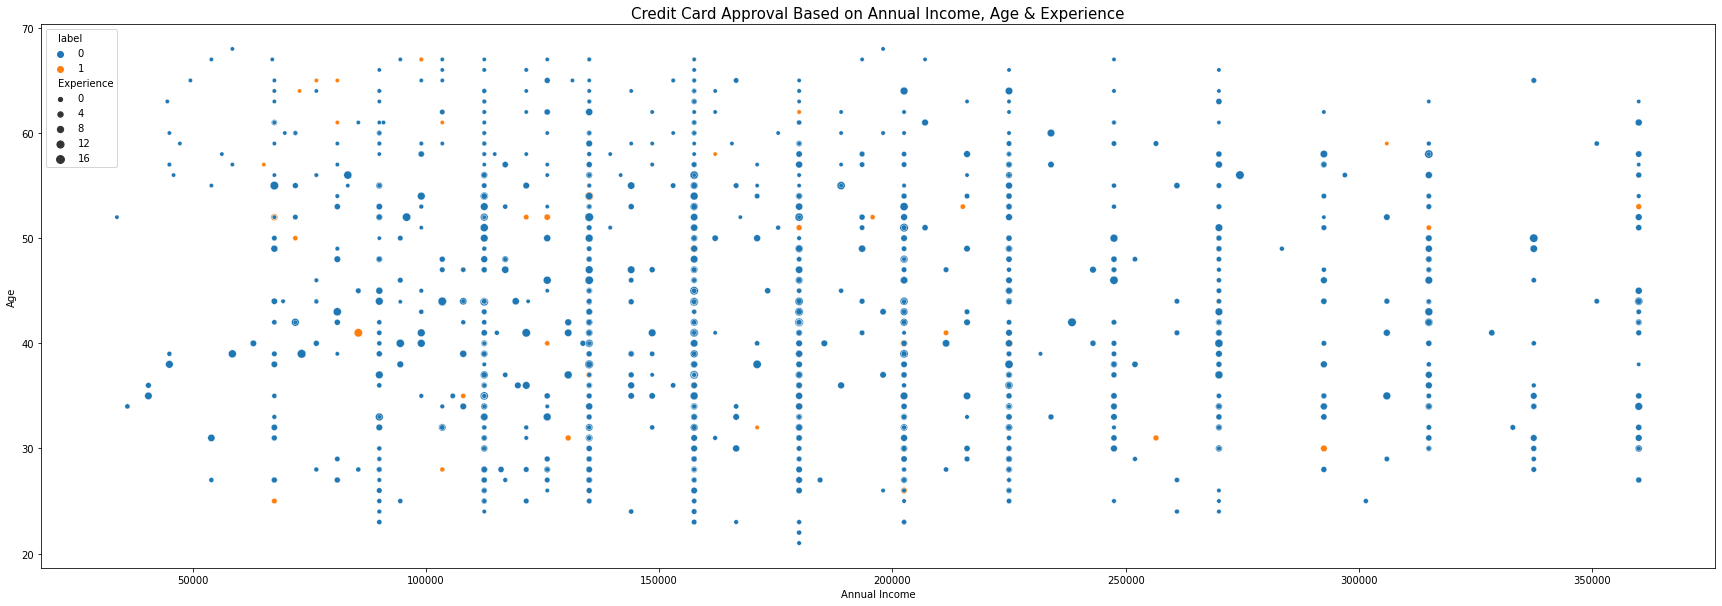

In [52]:
plt.figure(figsize = (30,10))

#Plotting "Age" and "Annual Income" plot on the basis of label and Experience.
sns.scatterplot(x = df['Annual_income'],y = df["Age"], hue = df["label"], size = df["Experience"])
plt.title("Credit Card Approval Based on Annual Income, Age & Experience", fontsize = 15)
plt.xlabel("Annual Income")
plt.ylabel("Age")
plt.show()

Obseravtion :- 

* Experience is divided into 0-4, 4-8, 8-12, 12-16 years with the label encoded 0(Approved) or 1(Rejected).
* There is high probabity to get the Credit Card Approval in the Age group 22 to 60 years.

* Annual Income ranging from 1LPA to (2-2.5)LPA also shows high chances to get the Credit Card Approval.

Conclusion :-

* Those people who have **4 to 16 years of Experience** and **Age 30-55 years** and **Annual Income ranging from 1.5 to 2 LPA** has High probabity to get the Credit Card Approval.

* From this, we can say **"Age"**, **"Experience"** and **"Annual Income"** are Crucial Features for the Feature Selection.


Mean of Annual Income by the Age are :
 Experience
(0, 2]      0.170543
(2, 4]      0.140065
(4, 6]      0.087805
(6, 8]      0.069182
(8, 10]     0.092308
(10, 12]    0.101449
(12, 14]    0.042553
(14, 16]    0.000000
(16, 18]    0.000000
(18, 20]    0.080000
Name: label, dtype: float64 



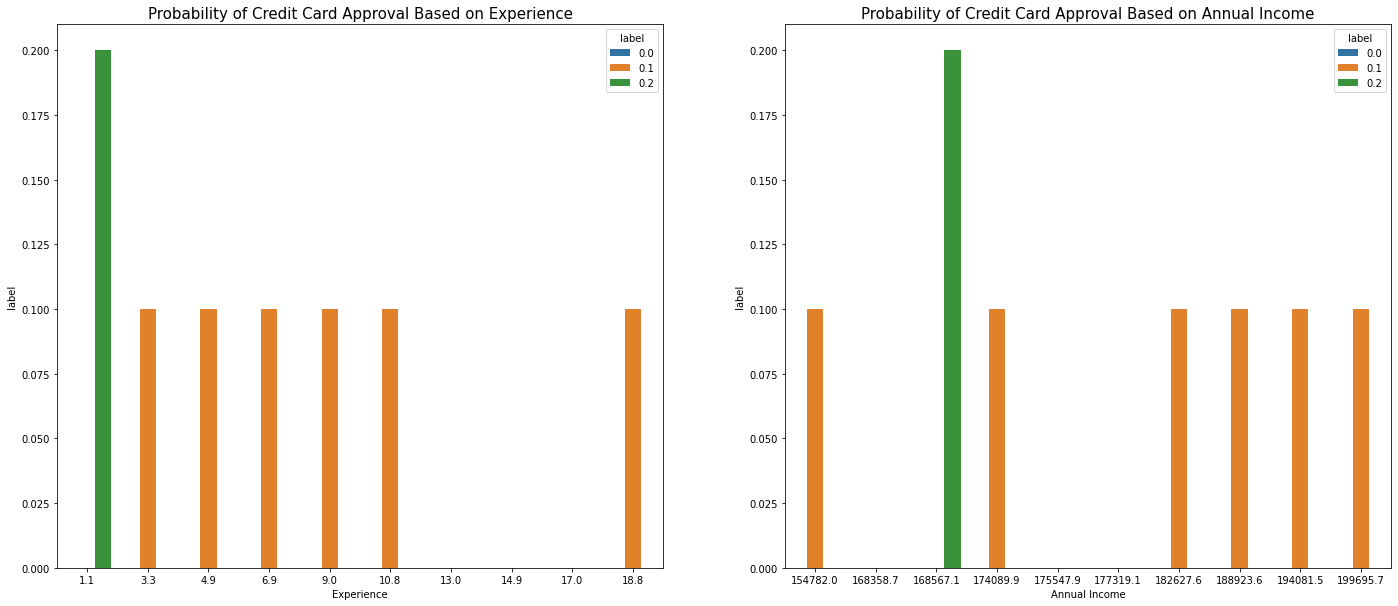

In [53]:
exp1 = pd.cut(df["Experience"], bins = list(np.arange(0,22,2)))
print("Mean of Annual Income by the Age are :\n",df.groupby(exp1)["label"].mean(),"\n")

cat3 = round(df[['Experience',"Annual_income", "label"]].groupby(pd.cut(df["Experience"], bins = list(np.arange(0,22,2))), as_index=False).mean(),1)
plt.figure(figsize =(50,10))

plt.subplot(1, 4, 1)
sns.barplot(x = "Experience", y = "label", data = cat3, hue = "label")
plt.title("Probability of Credit Card Approval Based on Experience", fontsize = 15)
plt.xlabel("Experience")
plt.ylabel("label")

plt.subplot(1, 4, 2)
sns.barplot(x = "Annual_income", y = "label", data = cat3, hue = "label")
plt.title("Probability of Credit Card Approval Based on Annual Income", fontsize = 15)
plt.xlabel("Annual Income")
plt.ylabel("label")
plt.show()

**OBSERVATIONS :-**
* People have 0 to 4 Year of Experience have 20% chances to get the Credit Card.
* Salary between 1.7 Lakhs to 2.25 Lakhs has 10% chances to get Credit Card.
* Salary between 1.9 to 2 Lakhs Lakhs has 20% chances to get Credit Card.

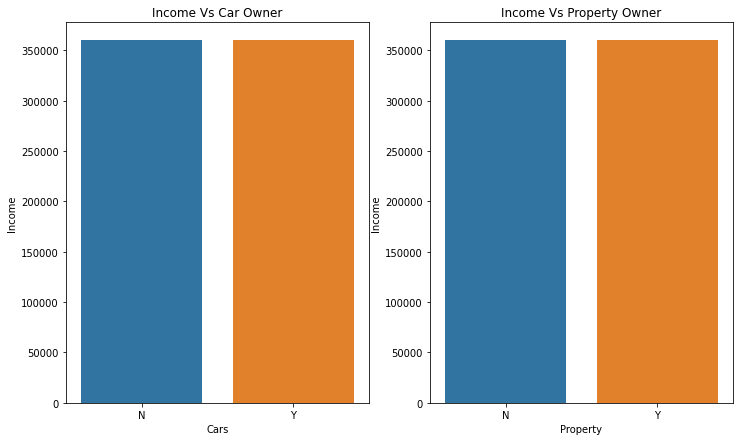

In [54]:
cat1 = df[["Car_Owner","Propert_Owner", "Annual_income"]].groupby(['Car_Owner','Propert_Owner'], as_index=False).agg({'Annual_income':'count','Annual_income':'max'})

plt.figure(figsize = (25,7))
plt.subplot(1, 4, 1)
sns.barplot(x= "Car_Owner", y = "Annual_income", data = cat1)
plt.title("Income Vs Car Owner")
plt.xlabel("Cars")
plt.ylabel("Income")

plt.subplot(1, 4, 2)
sns.barplot(x = "Propert_Owner", y = "Annual_income", data = cat1)
plt.title("Income Vs Property Owner")
plt.xlabel("Property")
plt.ylabel("Income")
plt.show()

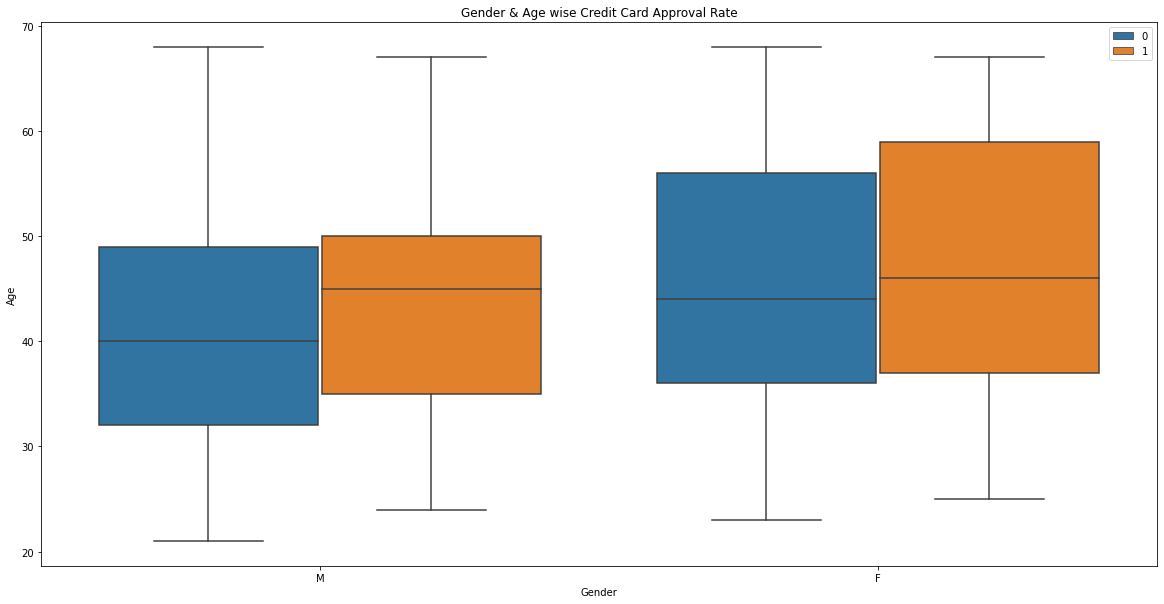

              GENDER
label GENDER        
0     F          870
      M          486
1     F           99
      M           75


In [55]:
plt.figure(figsize = (20,10))

# plt.subplot(1, 4, 1)
sns.boxplot(x = "GENDER", y = "Age", data = df, hue = "label")
plt.title("Gender & Age wise Credit Card Approval Rate")
plt.xlabel("Gender")
plt.ylabel("Age")
plt.legend(loc = "upper right")

# plt.subplot(1, 4, 2)
# sns.distplot(df[df["label"]==1]["GENDER"], hist = False, color="green", label = "Rejected")
# sns.distplot(df[df["label"]==0]["GENDER"], hist = False, color="blue", label = "Approved")
# plt.legend()
plt.show()

print(df.groupby(["label", "GENDER"])[["GENDER"]].count())

**OBSERVATIONS :-**
* Male has 35.84% chances and Female with **64.16%** chances to get the Credit Card Approval.
* From all dataset, Female has **56.86%** chances and Male has **31.76%** chances to get Credit Card Approval.

**Conclusions :-**

* From the observation, we can say that "Female" can claim Credit Card on the ratio of **0.8 times more** than "Male".

#**FEATURE SCALING**

###Feature Selection

In [56]:
df.corr()

,Ind_ID,CHILDREN,Annual_income,Age,Experience,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
Ind_ID,1.000000,0.035999,-0.029090,-0.022275,0.033450,NaN,0.084660,0.010398,-0.036772,0.016130,0.015775
CHILDREN,0.035999,1.000000,0.028431,-0.323197,0.155670,NaN,0.041032,-0.000316,0.041608,0.859850,-0.016617
Annual_income,-0.029090,0.028431,1.000000,-0.091094,0.133358,NaN,-0.049760,-0.022485,0.061473,0.037712,-0.042551
Age,-0.022275,-0.323197,-0.091094,1.000000,-0.190129,NaN,-0.172956,0.029518,-0.166900,-0.285569,0.042558
Experience,0.033450,0.155670,0.133358,-0.190129,1.000000,NaN,0.142054,0.000719,-0.033187,0.183404,-0.109528
Mobile_phone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Work_Phone,0.084660,0.041032,-0.049760,-0.172956,0.142054,NaN,1.000000,0.348948,-0.007897,0.081377,-0.005339
Phone,0.010398,-0.000316,-0.022485,0.029518,0.000719,NaN,0.348948,1.000000,0.019987,0.010921,0.000926
EMAIL_ID,-0.036772,0.041608,0.061473,-0.166900,-0.033187,NaN,-0.007897,0.019987,1.000000,0.047479,0.013133
Family_Members,0.016130,0.859850,0.037712,-0.285569,0.183404,NaN,0.081377,0.010921,0.047479,1.000000,-0.027286


In [57]:
#Droping soem columns which as least chances or no chances to increase accuracy of ML model.
df.drop(["Ind_ID", "Marital_status", "Mobile_phone", "Work_Phone", "Phone", "EMAIL_ID"], axis=1, inplace =True)

In [58]:
#Dividing into Independent and Dependent Variable.
X = df.drop(["label"], axis=1)
y = df["label"]

###Splitting into Independent & Dependent Variable

In [59]:
#Splitting into training and test dataset with 75% and 25% on random state=0.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [60]:
print("Train : ",X_train.shape, y_train.shape)
print("Test : ",X_test.shape, y_test.shape)

Train :  (1147, 11) (1147,)
Test :  (383, 11) (383,)


In [61]:
X_train.head()

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Housing_type,Age,Experience,Family_Members
1152,F,N,Y,0,90000.0,Pensioner,Secondary / secondary special,House / apartment,58.0,0.0,1
1418,F,N,N,0,180000.0,Working,Incomplete higher,House / apartment,54.0,5.2,1
922,M,N,N,0,157500.0,Working,Secondary / secondary special,House / apartment,48.0,9.9,2
1301,M,N,Y,0,85500.0,State servant,Secondary / secondary special,Co-op apartment,45.0,3.9,1
810,M,Y,N,1,99000.0,Pensioner,Secondary / secondary special,House / apartment,51.0,0.0,3


###Feature Encoding

In [62]:
# Importing ColumnTransformer, OneHotEncoder, 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder


transformer = ColumnTransformer(transformers = [
        ("cat1", OneHotEncoder(sparse = False, drop = "first"), [0,1,2,5,7]),
        ("cat2", OrdinalEncoder(categories=[["Incomplete higher", "Lower secondary", "Secondary / secondary special", "Academic degree", "Higher education"]]), [6])
    ], remainder= "passthrough")



#Using fit_transform to Standardize the train data
X_train = transformer.fit_transform(X_train)

#"transform" only to avoid data leakage
X_test = transformer.transform(X_test)

###Feature Scaling

In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#**MODEL SELECTION**

##Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
y_pred = log_reg.predict(X_test)
Log_reg_untune = accuracy_score(y_pred, y_test)*100
print("Accuracy of Logistic Regression Model : {}%".format(round(accuracy_score(y_pred, y_test)*100)))
print("Classification Report of Logistic Regression Model : \n",classification_report(y_pred, y_test))

Accuracy of Logistic Regression Model : 88%
Classification Report of Logistic Regression Model : 
               precision    recall  f1-score   support

           0       0.99      0.89      0.94       380
           1       0.02      0.33      0.04         3

    accuracy                           0.88       383
   macro avg       0.51      0.61      0.49       383
weighted avg       0.99      0.88      0.93       383



<Axes: xlabel='label', ylabel='Density'>

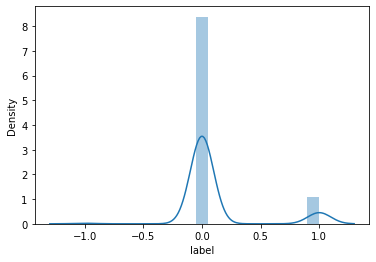

In [65]:
sns.distplot(y_test - y_pred)

In [66]:
confusion_matrix(y_pred, y_test)

array([[337,  43],
       [  2,   1]])

In [67]:
from sklearn.model_selection import GridSearchCV
parameter = {"penalty":["l1", "l2", "elasticnet"],
             "C" : [1,2,3,4,5,6,10,20,40,50],
             "max_iter" : [100,200,300,400,500]}
Classfier_Reg = GridSearchCV(log_reg,param_grid=parameter, scoring="accuracy", cv=10)

In [68]:
Classfier_Reg.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 40, 50],
                         'max_iter': [100, 200, 300, 400, 500],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [69]:
print(Classfier_Reg.best_params_)
print(Classfier_Reg.best_score_)
y_pred_tune_grid = Classfier_Reg.predict(X_test)
Log_reg_tune = accuracy_score(y_pred_tune_grid, y_test)*100
round(accuracy_score(y_pred_tune_grid, y_test)*100)

{'C': 1, 'max_iter': 100, 'penalty': 'l2'}
0.8866666666666665


88

In [70]:
confusion_matrix(y_pred_tune_grid, y_test)

array([[337,  43],
       [  2,   1]])

##Decision Tree Classifier

In [71]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train,y_train)
y_pred_dec = dec_tree.predict(X_test)
dec_tree_untune = accuracy_score(y_pred_dec, y_test)*100
accuracy_score(y_pred_dec, y_test)*100

83.02872062663185

<Axes: xlabel='label', ylabel='Density'>

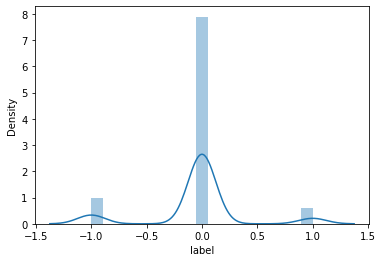

In [72]:
sns.distplot(y_test - y_pred_dec)

In [73]:
# from sklearn import tree
# tree.plot_tree(dec_tree)

#####Hyper Parameter Tuning for Decision Tree Classifier

In [74]:
from sklearn.model_selection import GridSearchCV
parameter_dtc = {"criterion" : ["gini", "entropy", "log_loss"],
                 "splitter" : ["best", "random"],
                 "max_depth" : [1,2,3,4,5],
                 "max_features" : ["auto", "sqrt", "log2"],
                 "ccp_alpha" : [1,2,3,4,5,6,7]}
Classfier_dtc = GridSearchCV(dec_tree,param_grid=parameter_dtc, scoring="accuracy", cv=10)

In [75]:
Classfier_dtc.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [1, 2, 3, 4, 5, 6, 7],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [76]:
print(Classfier_dtc.best_params_)

{'ccp_alpha': 1, 'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto', 'splitter': 'best'}


In [77]:
print(Classfier_dtc.best_score_)

0.8866590389016018


In [78]:
y_pred_tune_dtc = Classfier_dtc.predict(X_test)

In [79]:
dec_tree_tune = accuracy_score(y_pred_tune_dtc, y_test)*100
accuracy_score(y_pred_tune_dtc, y_test)*100

88.51174934725849

In [80]:
print(classification_report(y_pred_tune_dtc, y_test))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94       383
           1       0.00      0.00      0.00         0

    accuracy                           0.89       383
   macro avg       0.50      0.44      0.47       383
weighted avg       1.00      0.89      0.94       383



##KNN

In [81]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
knn_untune = accuracy_score(y_pred_knn, y_test)*100
accuracy_score(y_pred_knn, y_test)*100

87.46736292428199

<Axes: xlabel='label', ylabel='Density'>

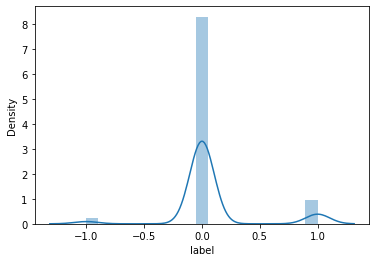

In [82]:
sns.distplot(y_test - y_pred_knn)

#####Hyper Parameter Tuning for KNN

In [83]:
from sklearn.model_selection import GridSearchCV
parameter_knn = {"n_neighbors" : list(np.arange(1,30,1)),
                 "weights" : ["uniform", "distance"],
                 "algorithm" : ["auto", "ball_tree", "kd_tree", "brute"]}
Classfier_knn = GridSearchCV(knn,param_grid=parameter_knn, scoring="accuracy", cv=10)

In [84]:
Classfier_knn.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [85]:
print(Classfier_knn.best_params_)

{'algorithm': 'auto', 'n_neighbors': 13, 'weights': 'distance'}


In [86]:
print(Classfier_knn.best_score_)

0.9198093058733792


In [87]:
y_pred_tune_knn = Classfier_knn.predict(X_test)

In [88]:
knn_tune = accuracy_score(y_pred_tune_knn, y_test)*100
accuracy_score(y_pred_tune_knn, y_test)*100

90.60052219321149

In [89]:
print(classification_report(y_pred_tune_knn, y_test))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95       367
           1       0.27      0.75      0.40        16

    accuracy                           0.91       383
   macro avg       0.63      0.83      0.67       383
weighted avg       0.96      0.91      0.93       383



##Random Forest Classifier

In [90]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train,y_train)
y_pred_rfc = random_forest.predict(X_test)
random_forest_untune = accuracy_score(y_pred_rfc, y_test)*100
accuracy_score(y_pred_rfc, y_test)*100

91.64490861618799

<Axes: xlabel='label', ylabel='Density'>

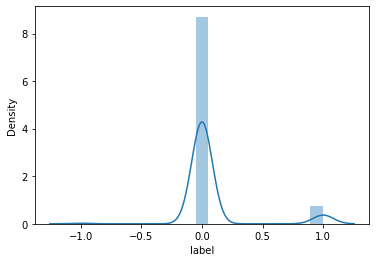

In [91]:
sns.distplot(y_test - y_pred_rfc)

#####Hyper Parameter Tuning for Random Forest Classifier

In [92]:
from sklearn.model_selection import GridSearchCV
parameter_rfc = {"n_estimators" : list(np.arange(10,15,1)),
                 "criterion" : ["gini", "entropy", "log_loss"],
                 "max_depth" : list(np.arange(0,14))}
Classfier_rfc = GridSearchCV(random_forest,param_grid=parameter_rfc, scoring="accuracy", cv=10)

In [93]:
Classfier_rfc.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13],
                         'n_estimators': [10, 11, 12, 13, 14]},
             scoring='accuracy')

In [94]:
print(Classfier_rfc.best_params_)

{'criterion': 'gini', 'max_depth': 13, 'n_estimators': 14}


In [95]:
print(Classfier_rfc.best_score_)

0.9198016781083143


In [96]:
y_pred_tune_rfc = Classfier_rfc.predict(X_test)

In [97]:
random_forest_tune = accuracy_score(y_pred_tune_rfc, y_test)*100
accuracy_score(y_pred_tune_rfc, y_test)*100

89.55613577023499

In [98]:
print(classification_report(y_pred_tune_rfc, y_test))

              precision    recall  f1-score   support

           0       0.99      0.90      0.94       375
           1       0.14      0.75      0.23         8

    accuracy                           0.90       383
   macro avg       0.57      0.82      0.59       383
weighted avg       0.98      0.90      0.93       383



##XGBoost

In [99]:
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train,y_train)
y_pred_xgb = xgb_classifier.predict(X_test)
accuracy_score(y_test,y_pred_xgb)*100

91.12271540469973

<Axes: xlabel='label', ylabel='Density'>

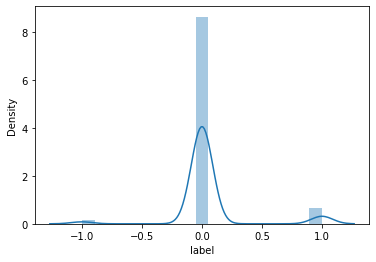

In [100]:
sns.distplot(y_test - y_pred_xgb)

#**ACCURACY : GRAPH**

#####Untuned Algorithm Graph

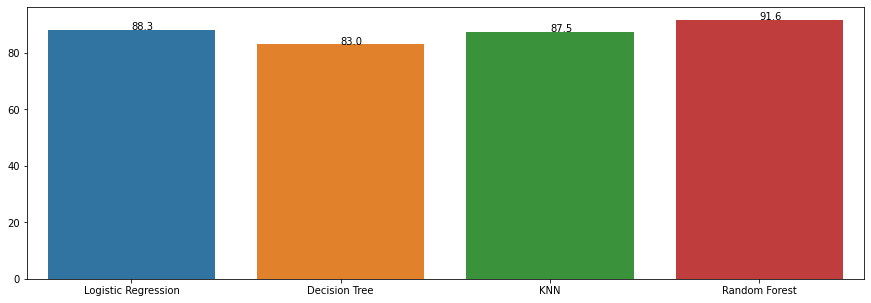

In [101]:
untuned_algo = [Log_reg_untune, dec_tree_untune, knn_untune, random_forest_untune]
Algo_value_untune = []
for i in untuned_algo:
  Algo_value_untune.append(round(i,1))
Algo = ["Logistic Regression", "Decision Tree" , "KNN", "Random Forest"]
plt.figure(figsize=(15,5))
def addlabels_untune(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], horizontalalignment = "left")
sns.barplot(x= Algo, y = untuned_algo)
addlabels_untune(Algo, Algo_value_untune)

#####Tuned Algorithm Graph

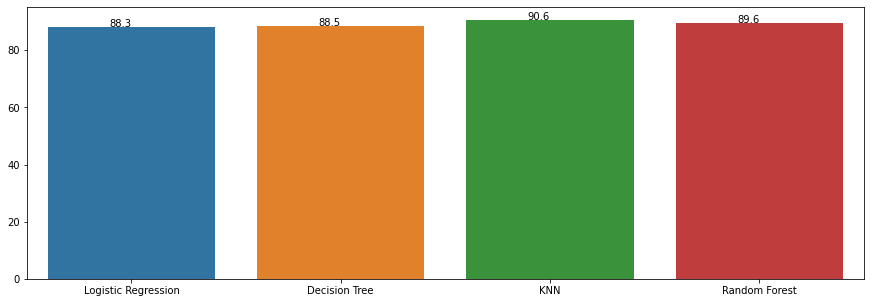

In [102]:
tuned_algo = [Log_reg_tune, dec_tree_tune, knn_tune, random_forest_tune]
Algo_value_tune = []
for i in tuned_algo:
  Algo_value_tune.append(round(i,1))
Algo = ["Logistic Regression", "Decision Tree" , "KNN", "Random Forest"]
plt.figure(figsize=(15,5))
def addlabels_tune(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], horizontalalignment = "right")
sns.barplot(x = Algo, y = Algo_value_tune)
addlabels_tune(Algo, Algo_value_tune)

#####Comparision 

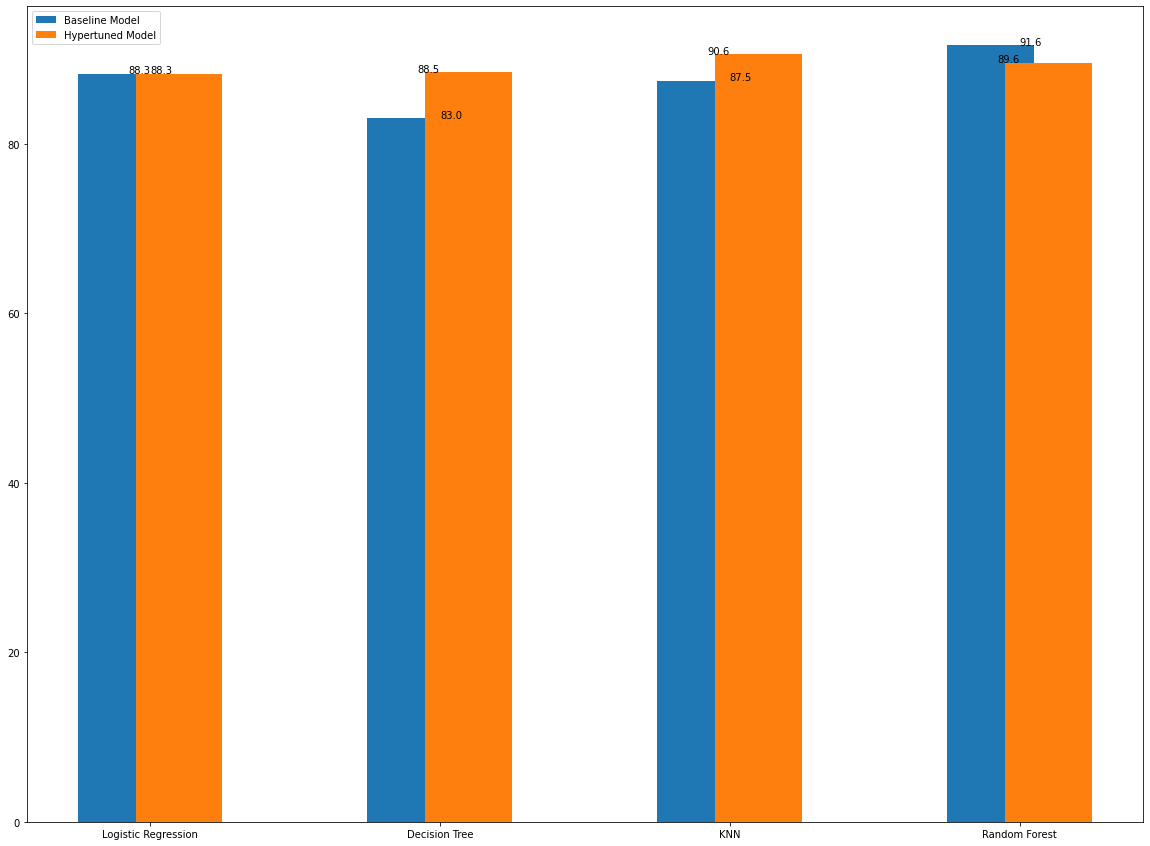

In [103]:
plt.figure(figsize=(20,15))
X_label_algo = np.arange(len(Algo))
plt.bar(X_label_algo-0.1, untuned_algo, 0.3, label = "Baseline Model")
plt.bar(X_label_algo+0.1, tuned_algo, 0.3, label = "Hypertuned Model" )
plt.xticks(X_label_algo, Algo)
plt.legend(loc = "upper left")
addlabels_tune(Algo, Algo_value_tune)
addlabels_untune(Algo, Algo_value_untune)